나이브 베이즈(naive bayes)는 확률 기반 머신러닝 분류 알고리즘이다.
나이브 베이즈 분류 알고리즘은 데이터를 나이브(단순)하고 독립적인 사건으로 가정하고 이 독립 사건들을 베이즈 이론에 대입시켜 가장 높은 확률의 레이블로 분류를 실행하는 알고리즘이다.
***
가우시안 나이브 베이즈(Gaussian Naive Bayes)
분류 특징들의 값이 정규(가우시안) 분포되어 있다는 가정 하에 조건부 확률을 계산하며 연속적인 성질이 있는 특성 데이터를 분류하는데 적합하다.

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

P(A): 어떤 사건 A가 일어날 확률
P(A|B): 어떤 사건 B가 일어났을 때 사건 A가 일어날 확률

베르누이 나이브 베이즈(Berniulli Naive Bayes)
분류 데이터의 특징이 0 또는 1로 표현되었을 때 데이터의 출현 여부애 따라서 0 또는 1로 구분되는 데이터에 사용된다.

다항분포 나이브 베이즈(Multinimial Naive Bayes)
분류 데이터의 특징이 출현 횟수로 표현되었을 때 데이터의 출현 횟수에 따라 값을 달리하는 데이터에 사용된다.

가우시안 나이브 베이즈를 활용한 붓꽃 분류

In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [49]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

데이터 획득
사이킷런에서 제공하는 붓꽃(iris) 데이터 셋을 사용한다.

In [15]:
dataset = load_iris() # iris 데이터셋을 불러온다.
print(type(dataset))
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# sepal length: 꽃 받침 길이, sepal width: 꽃 받침 너비, petal length: 꽃잎 길이, petal width: 꽃잎 너비
# setosa, versicolor, virginica: 품종
df['target'] = dataset.target
df.target = df.target.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df

<class 'sklearn.utils.Bunch'>


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        target  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

데이터 시각화

In [17]:
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

꽃받침 길이

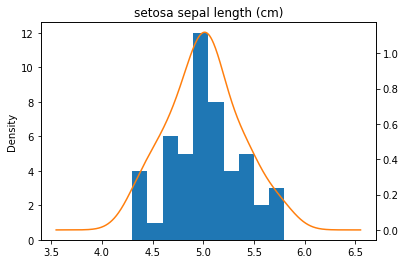

In [24]:
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title='setosa sepal length (cm)')
plt.show()

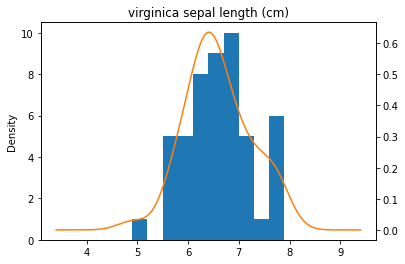

In [25]:
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title='virginica sepal length (cm)')
plt.show()

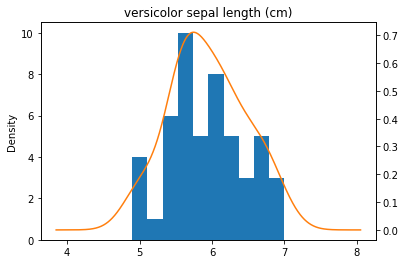

In [26]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title='versicolor sepal length (cm)')
plt.show()

꽃받침 너비

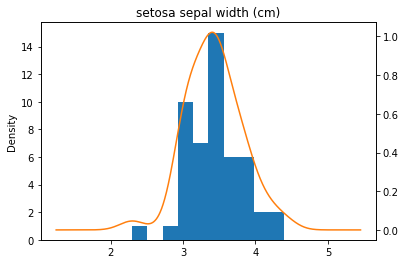

In [27]:
ax = setosa_df['sepal width (cm)'].plot(kind='hist')
setosa_df['sepal width (cm)'].plot(kind='kde', ax=ax, secondary_y=True, title='setosa sepal width (cm)')
plt.show()

데이터 전처리

In [43]:
# 전체 데이터의 20%를 테스트 데이터로 분리하고 나머지 80%를 학습에 사용한다.
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, train_size=0.8)
print('X_train: {}, X_test: {}'.format(len(X_train), len(X_test)))
print('y_train: {}, y_test: {}'.format(len(y_train), len(y_test)))
print('[꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비](문제): {}, 품종(답): {}'.format(X_train[0], y_train[0]))

X_train: 120, X_test: 30
y_train: 120, y_test: 30
[꽃받침 길이, 꽃받침 너비, 꽃잎 길이, 꽃잎 너비](문제): [5.  3.6 1.4 0.2], 품종(답): 0


가우시안 나이브 베이즈 모델 학습

In [46]:
model = GaussianNB() # 가우시안 나이브 베이즈 모델 객체를 만든다.
model.fit(X_train, y_train) # 가우시안 나이브 베이즈 모델을 학습시킨다.

GaussianNB()

모델 테스트

In [48]:
predict = model.predict(X_test) # 학습 데이터로 학습한 결과에 따른 테스트 데이터의 예측 값을 계산한다.
print(classification_report(y_test, predict)) # classification_report(실제값, 예측값)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [50]:
print('정확도: {:.2f}'.format(accuracy_score(y_test, predict)))

정확도: 1.00


In [52]:
comparison = pd.DataFrame({'예측값': predict, '실제값': y_test})
comparison

예측값  실제값
0     2    2
1     2    2
2     0    0
3     2    2
4     0    0
5     1    1
6     1    1
7     1    1
8     2    2
9     2    2
10    0    0
11    1    1
12    0    0
13    0    0
14    1    1
15    2    2
16    2    2
17    0    0
18    1    1
19    1    1
20    2    2
21    2    2
22    1    1
23    1    1
24    0    0
25    0    0
26    0    0
27    1    1
28    2    2
29    1    1